# Alphalens: predictive vs. non-predictive factor

This is a very simply notebook in which we use Alphalens to analyse a predictive and a non-predictive factor. The goal is to have exemplifying output for both scenarios to make clear what to expect from Alphalens in the case of a predictive and a non-preditive factor. 

In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

Below is a simple mapping of tickers to sectors for a universe of 500 large cap stocks.

In [3]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy" 
}

ticker_sector = {
    "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
    "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
    "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
    "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
    "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
    "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
    "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
    "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
    "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
    "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
    "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
    "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
    "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
    "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
    "T" : 7, "CTL" : 7, "VZ" : 7, 
    "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
    "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
    "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
    "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
    "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
}

In [4]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

tickers = list(ticker_sector.keys())

df = web.get_data_yahoo(tickers, start='2017-01-01',  end='2017-06-01')

[*********************100%***********************]  182 of 182 completed

19 Failed downloads:
- HCP: No data found, symbol may be delisted
- DWDP: No data found, symbol may be delisted
- AGN: No data found, symbol may be delisted
- BHGE: No data found, symbol may be delisted
- GGP: No data found for this date range, symbol may be delisted
- CELG: No data found, symbol may be delisted
- CHK: Data doesn't exist for startDate = 1483250400, endDate = 1496293200
- BCR: No data found for this date range, symbol may be delisted
- BHF: Data doesn't exist for startDate = 1483250400, endDate = 1496293200
- APC: No data found, symbol may be delisted
- ARNC: Data doesn't exist for startDate = 1483250400, endDate = 1496293200
- MON: Data doesn't exist for startDate = 1483250400, endDate = 1496293200
- BBT: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- DPS: No data found for this date range, symbol may be delisted
- CBG: No data found for this date range, sy

In [5]:
df = df.stack()
df.index.names = ['date', 'asset']
df = df.tz_localize('UTC', level='date')

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestamps will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on  assets open prices.

In [6]:
pricing = df['Open'].unstack('asset')

We'll use a naive factor as non-predictive factor, we'll rank stocks based on recent performance: stocks that performed well in the last 10 days will have high rank and vice versa.

In [7]:
non_predictive_factor = pricing.pct_change(10)
non_predictive_factor = non_predictive_factor.stack()

To create a predictive factor we'll cheat: we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [8]:
lookahead_bias_days = 5

predictive_factor = pricing.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()

# Run Alphalens on the non-predictive factor

In [9]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(non_predictive_factor, 
                                                                                  pricing, 
                                                                                  quantiles=5,
                                                                                  bins=None,
                                                                                  groupby=ticker_sector,
                                                                                  groupby_labels=sector_names)

Dropped 10.8% entries from factor data: 10.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.241692,0.010187,-0.046054,0.029545,2739,20.245399
2,-0.040770,0.025607,-0.008747,0.011095,2656,19.631902
3,-0.019082,0.039687,0.006244,0.010804,2739,20.245399
4,-0.001776,0.055556,0.021277,0.012495,2656,19.631902
5,0.010359,0.412060,0.055495,0.034437,2739,20.245399


Returns Analysis


,1D,5D,10D
Ann. alpha,0.001,0.054,0.066
beta,-0.168,-0.204,-0.122
Mean Period Wise Return Top Quantile (bps),-3.732,-1.523,-0.416
Mean Period Wise Return Bottom Quantile (bps),-2.099,-4.991,-5.240
Mean Period Wise Spread (bps),-1.633,3.493,4.834


<Figure size 432x288 with 0 Axes>

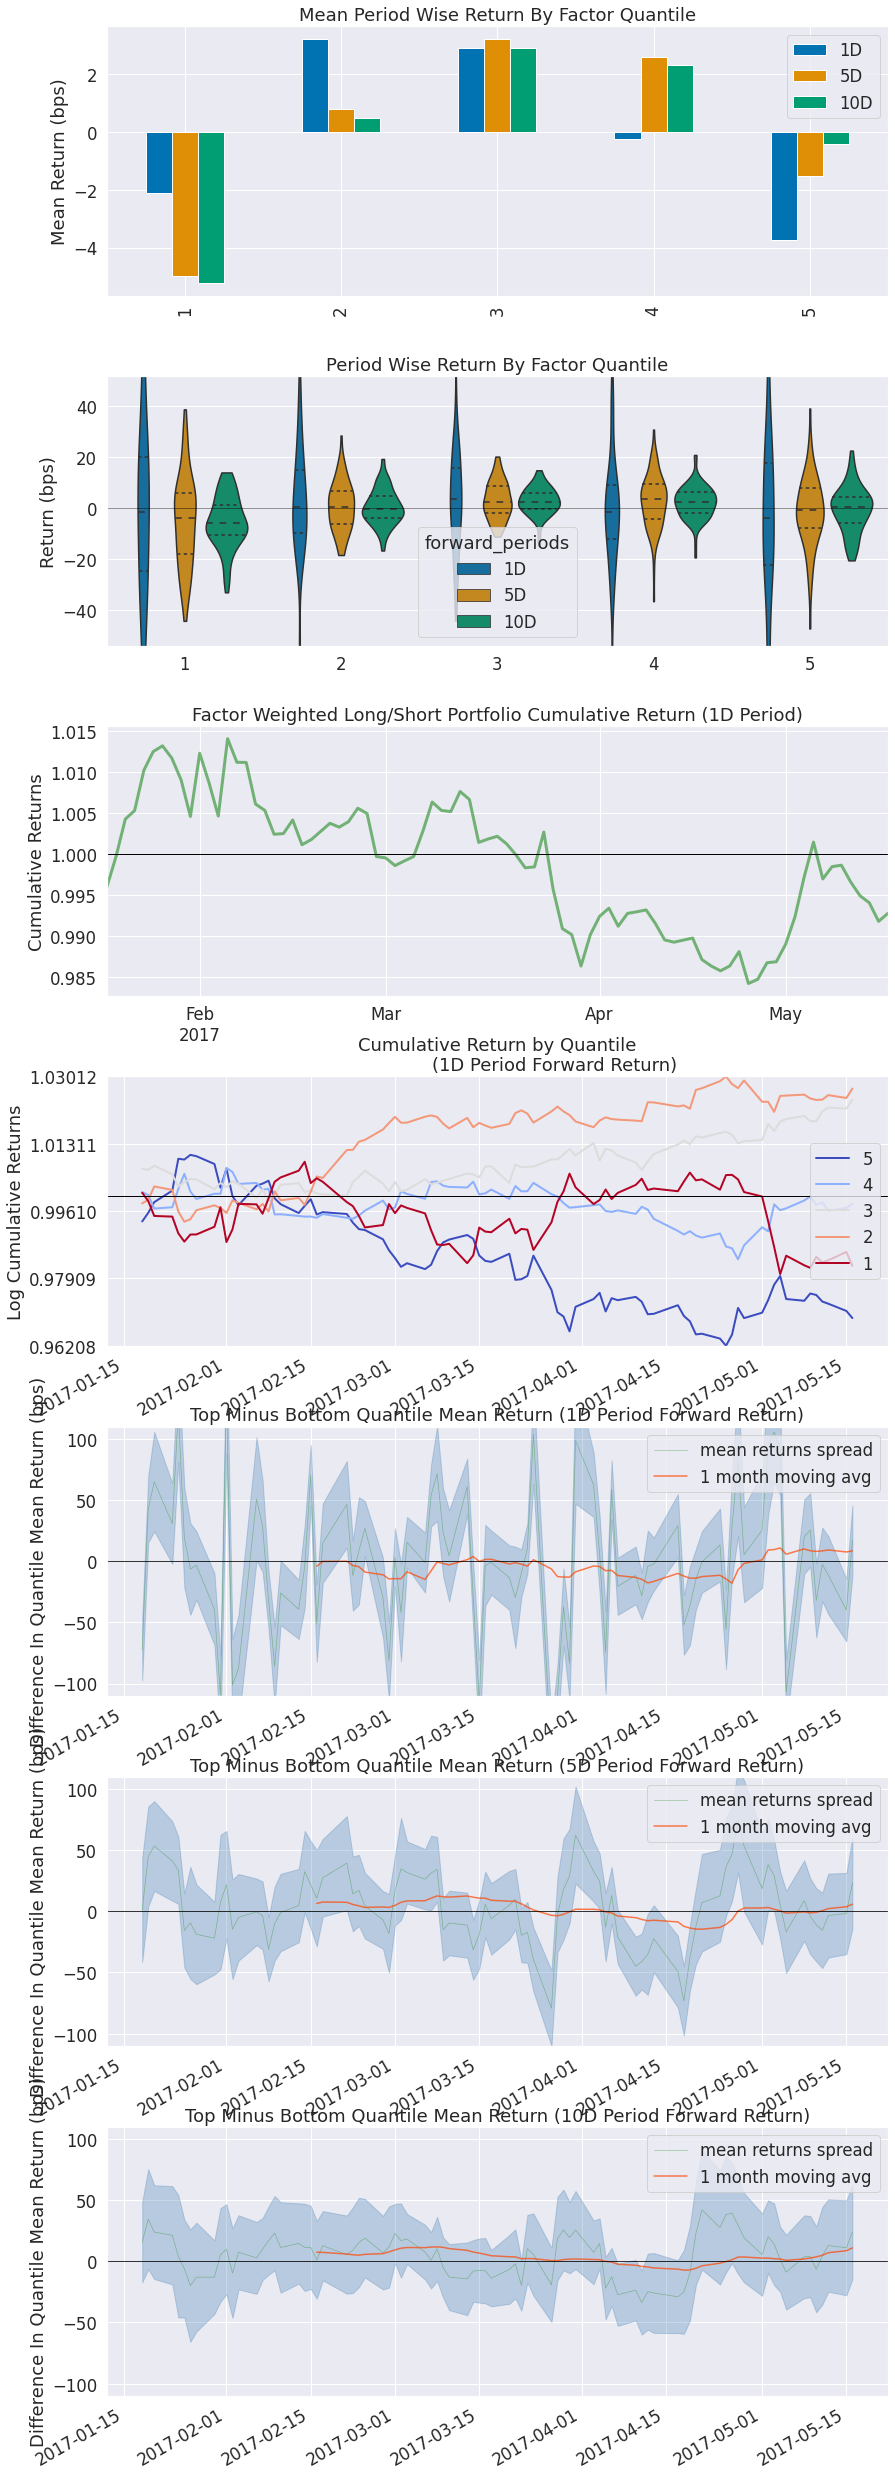

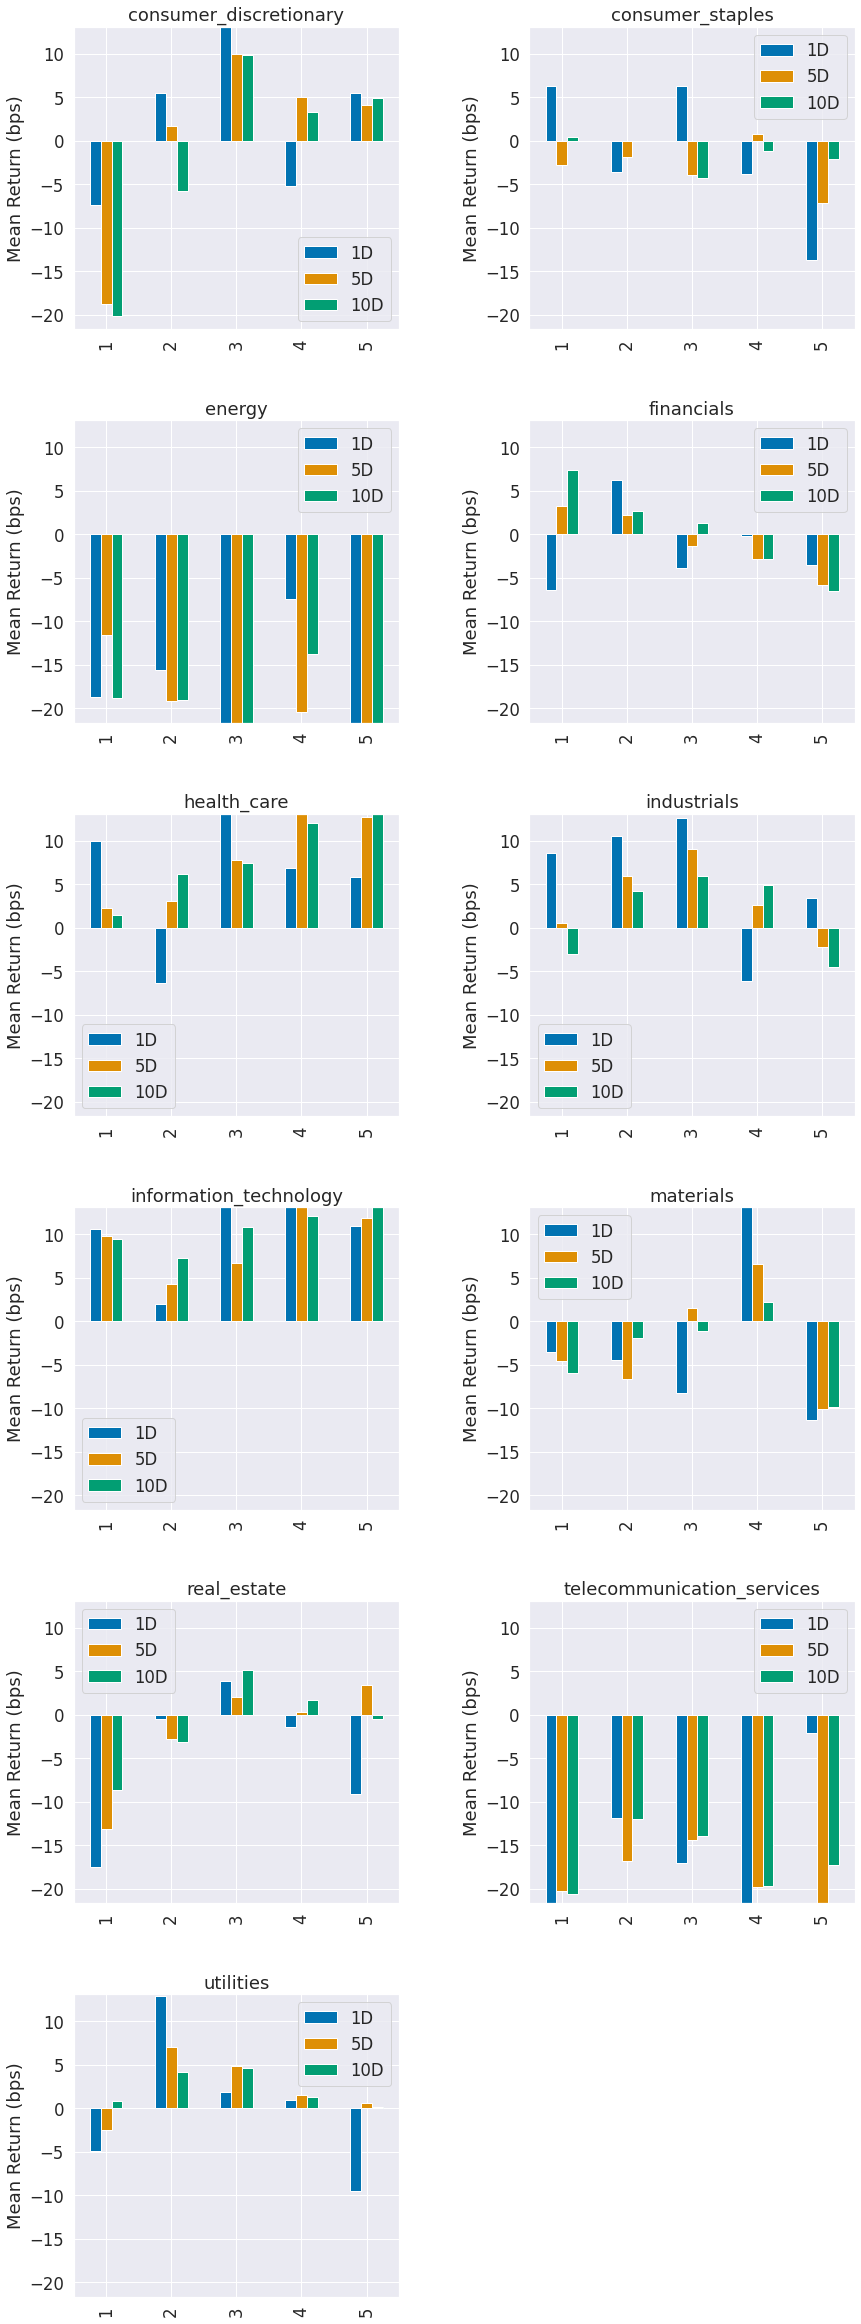

Information Analysis


,1D,5D,10D
IC Mean,-0.013,0.014,0.045
IC Std.,0.164,0.192,0.169
Risk-Adjusted IC,-0.077,0.075,0.266
t-stat(IC),-0.700,0.679,2.425
p-value(IC),0.486,0.499,0.017
IC Skew,-0.263,-0.326,-0.393
IC Kurtosis,0.544,-0.429,-0.859


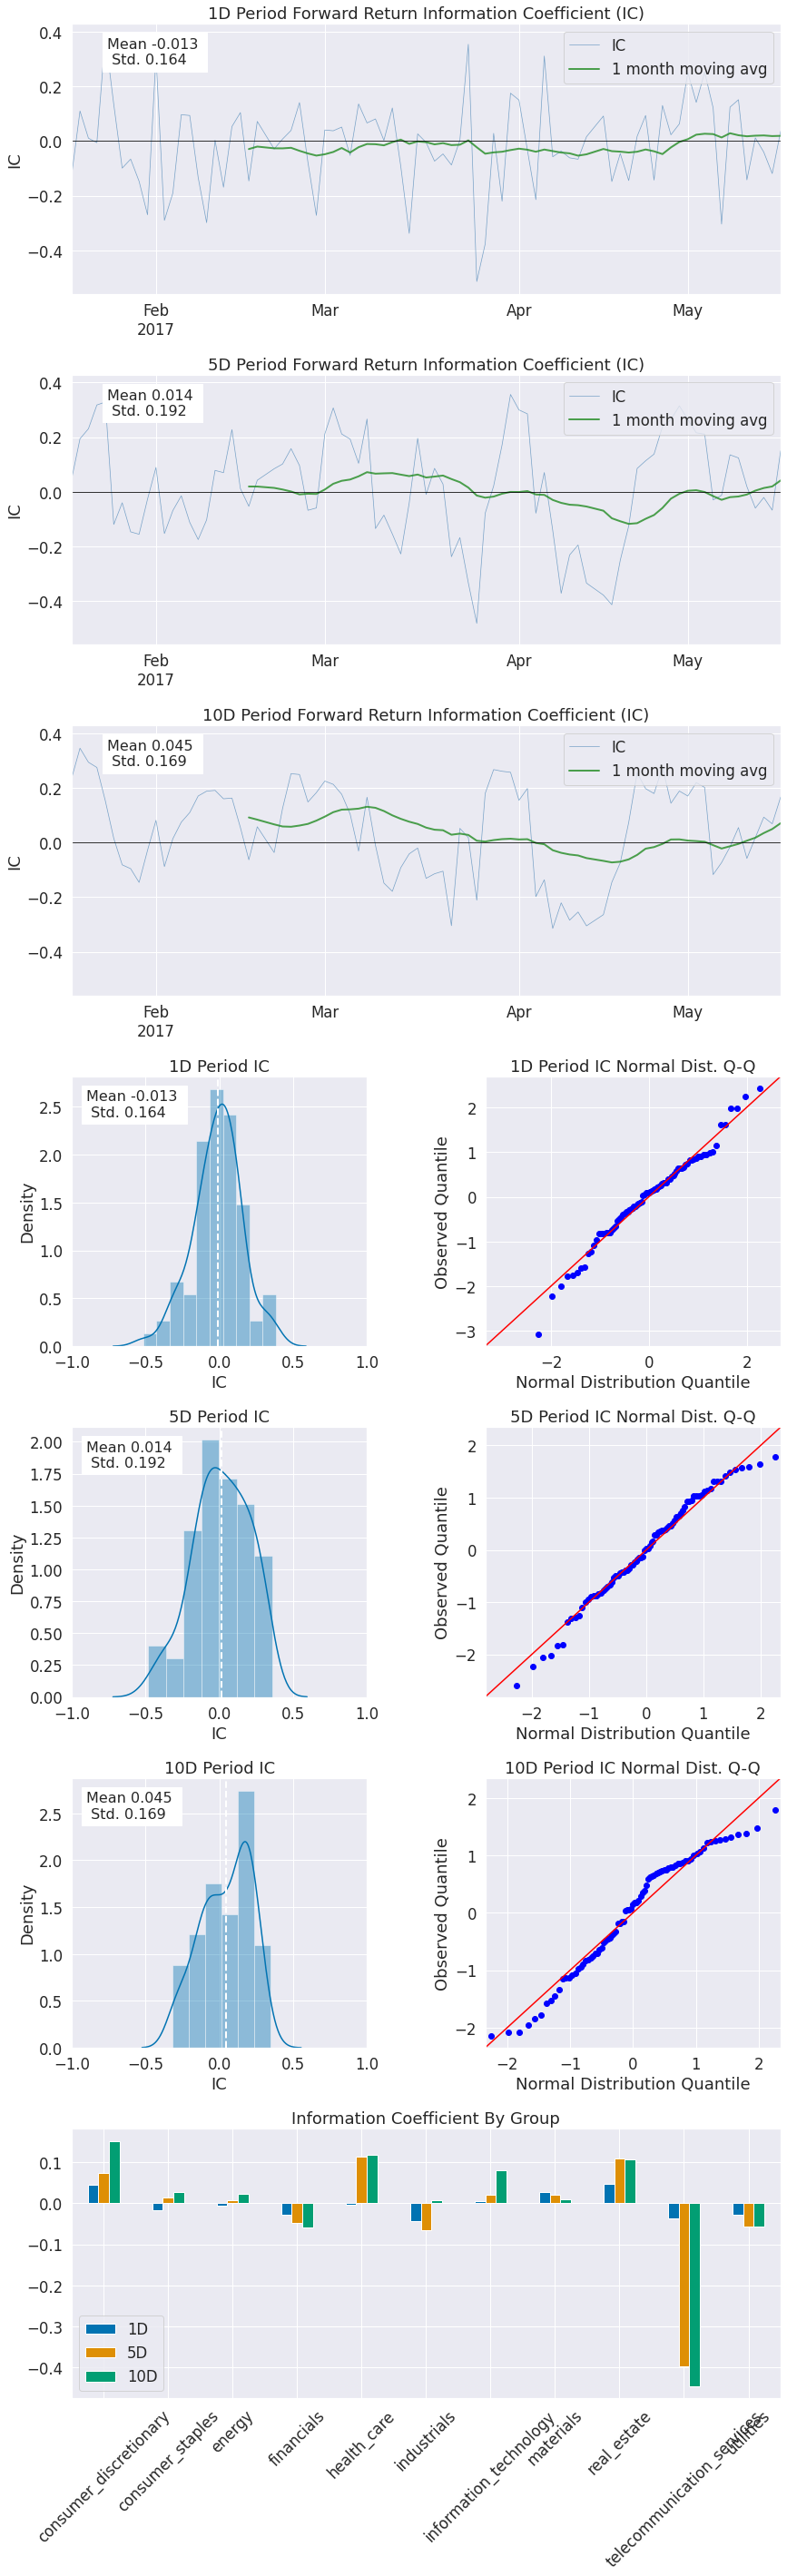

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.234,0.489,0.717
Quantile 2 Mean Turnover,0.496,0.730,0.804
Quantile 3 Mean Turnover,0.540,0.733,0.789
Quantile 4 Mean Turnover,0.516,0.729,0.788
Quantile 5 Mean Turnover,0.248,0.562,0.789


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.862,0.467,0.046


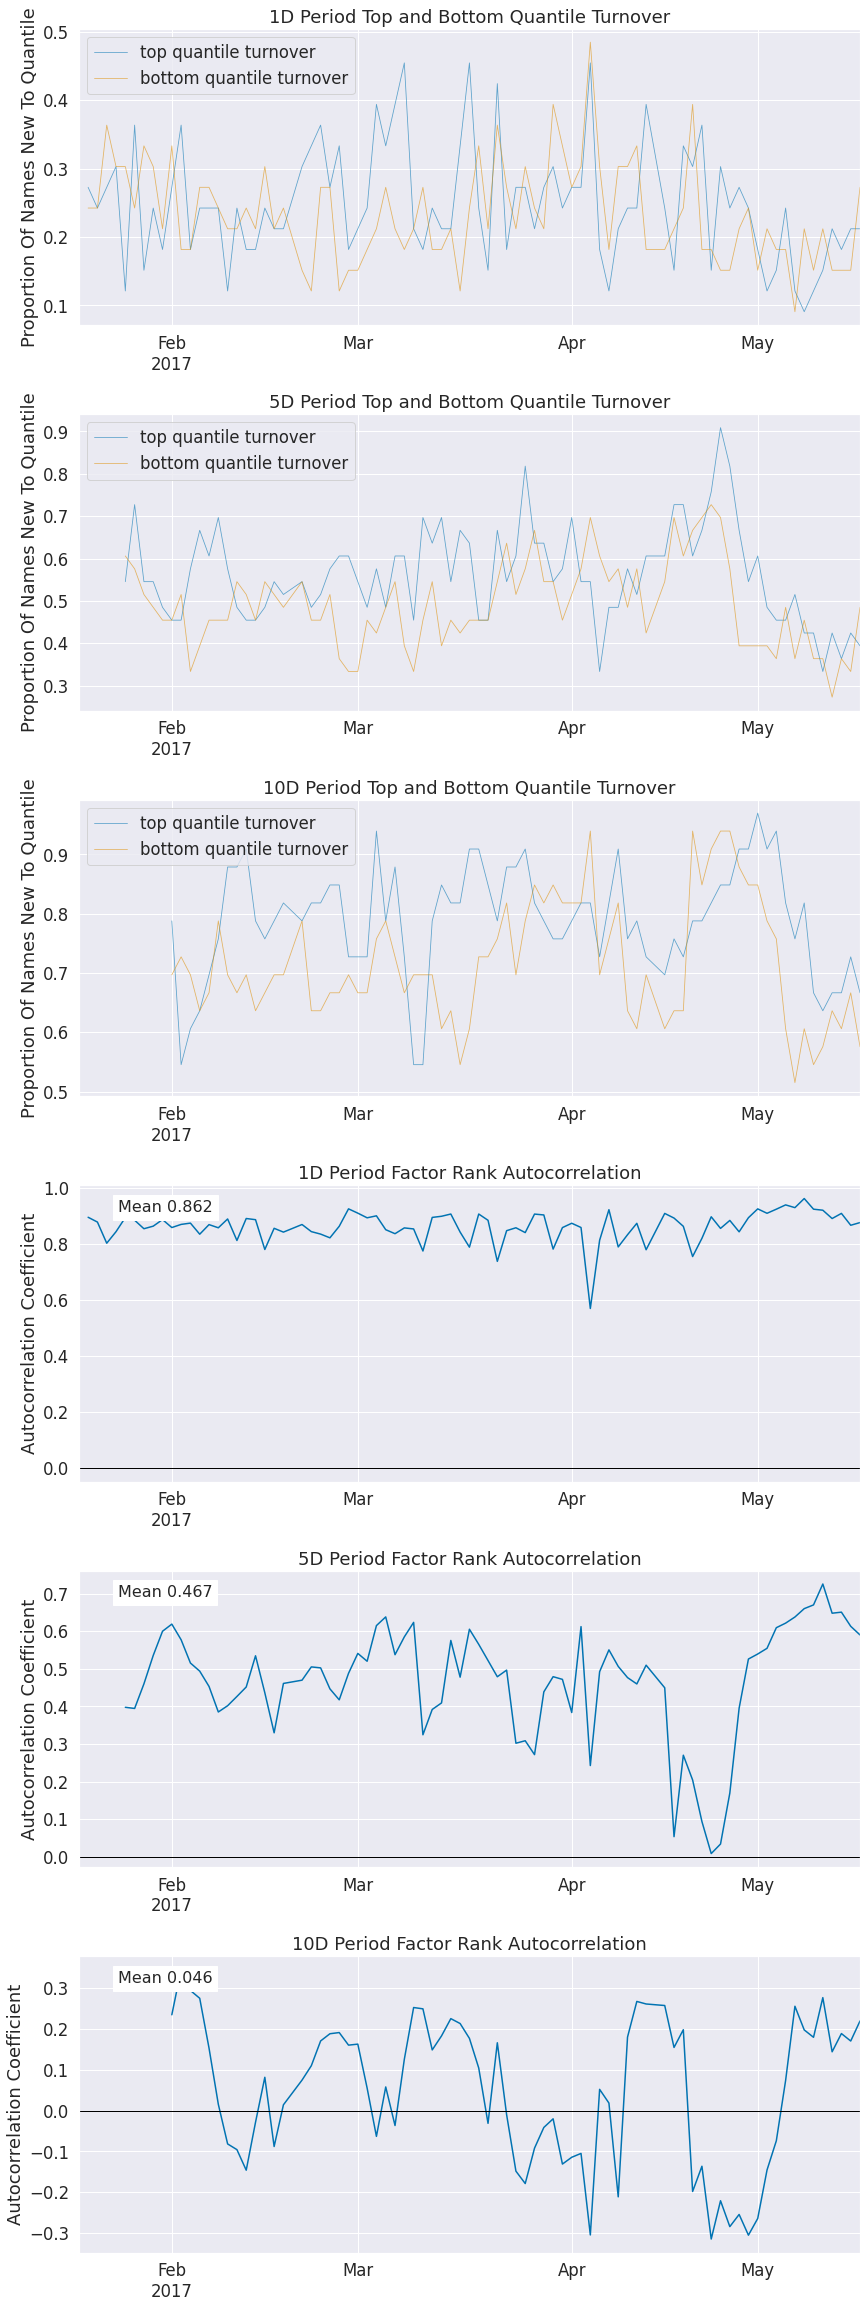

In [10]:
alphalens.tears.create_full_tear_sheet(non_predictive_factor_data, by_group=True)

# Run Alphalens on the predictive factor

In [11]:
predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                              pricing, 
                                                                              quantiles=5,
                                                                              bins=None,
                                                                              groupby=ticker_sector,
                                                                              groupby_labels=sector_names)

Dropped 5.1% entries from factor data: 5.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.262200,0.001669,-0.032906,0.023698,3069,20.245399
2,-0.036913,0.011425,-0.007799,0.008759,2976,19.631902
3,-0.023938,0.024348,0.002738,0.008200,3069,20.245399
4,-0.012384,0.040420,0.013049,0.009074,2976,19.631902
5,-0.002385,0.325472,0.037295,0.025043,3069,20.245399


Returns Analysis


,1D,5D,10D
Ann. alpha,6.268,5.847,1.566
beta,-0.080,0.032,0.147
Mean Period Wise Return Top Quantile (bps),70.386,68.693,33.407
Mean Period Wise Return Bottom Quantile (bps),-74.866,-71.783,-36.977
Mean Period Wise Spread (bps),145.251,140.482,70.390


<Figure size 432x288 with 0 Axes>

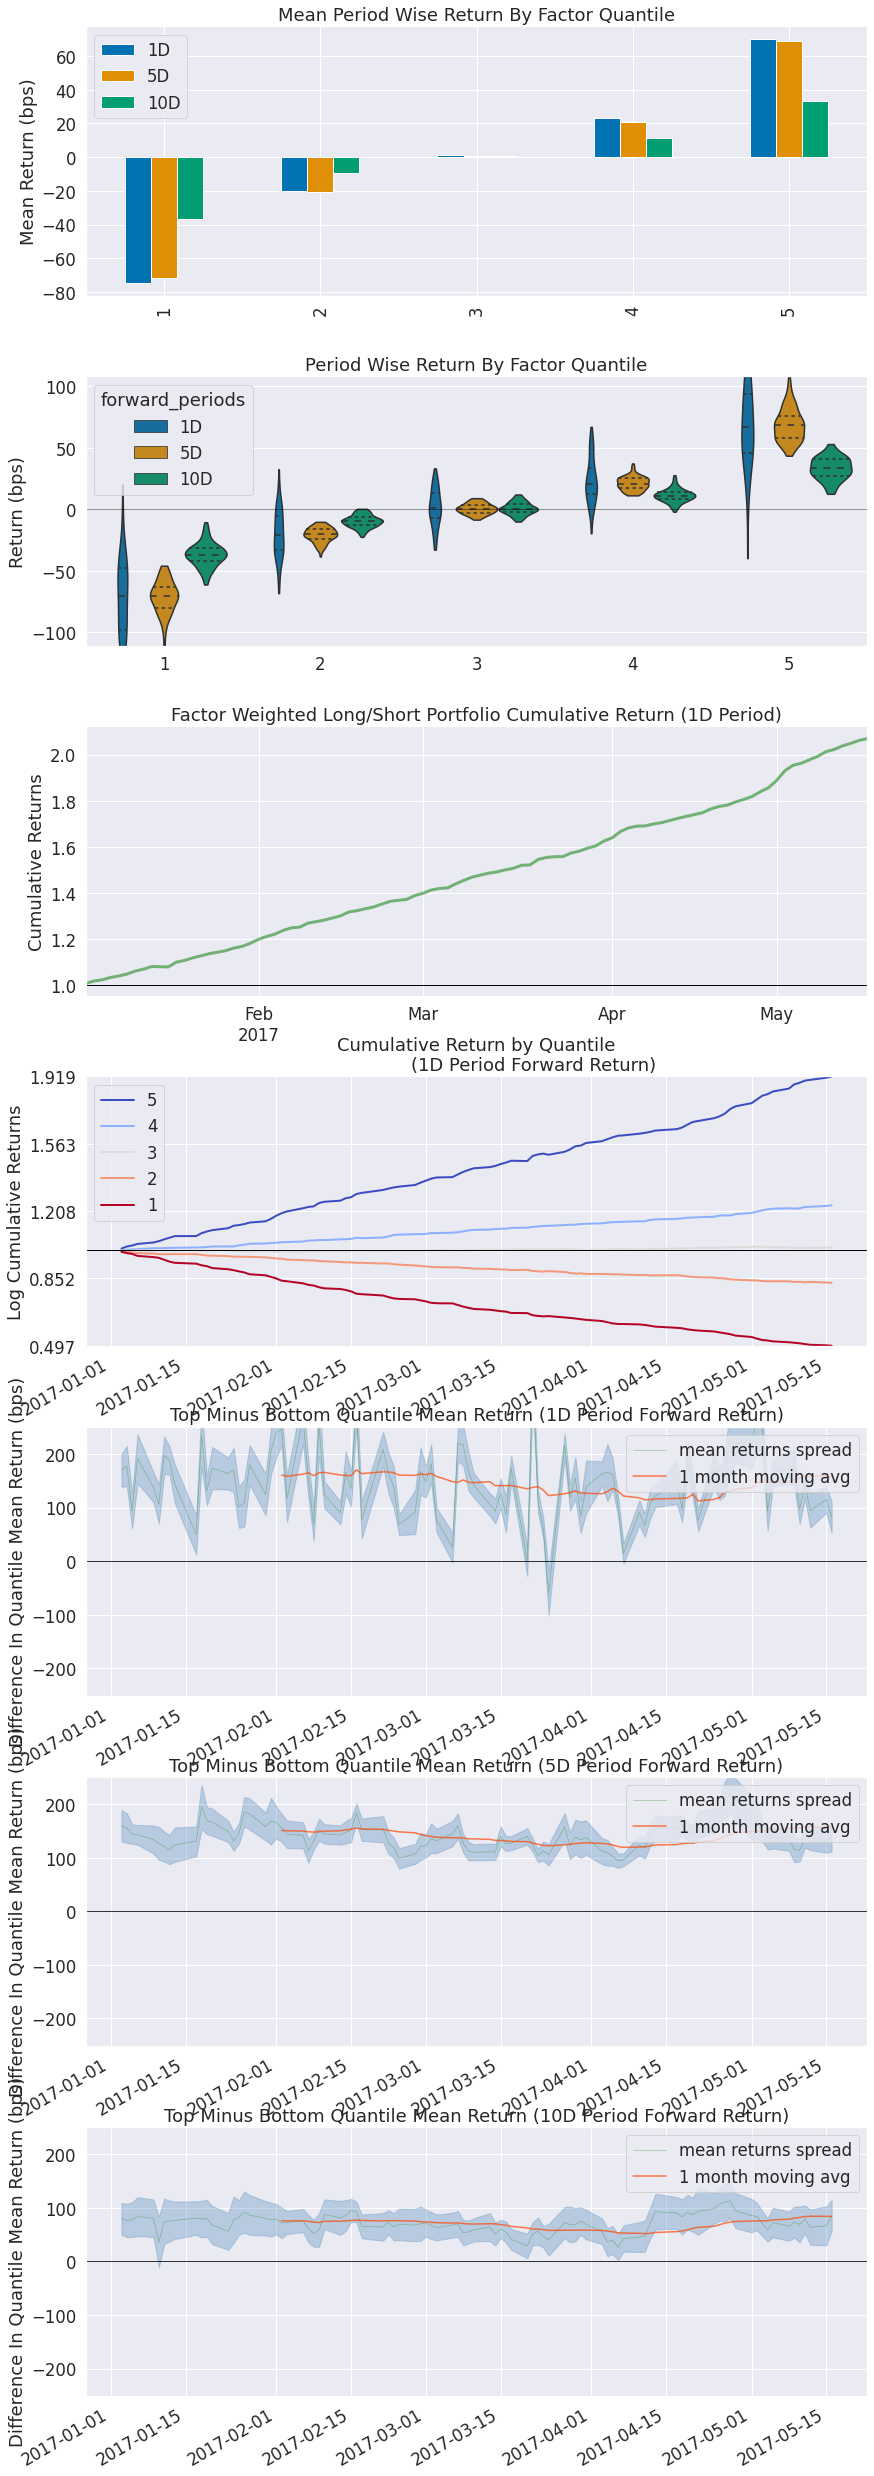

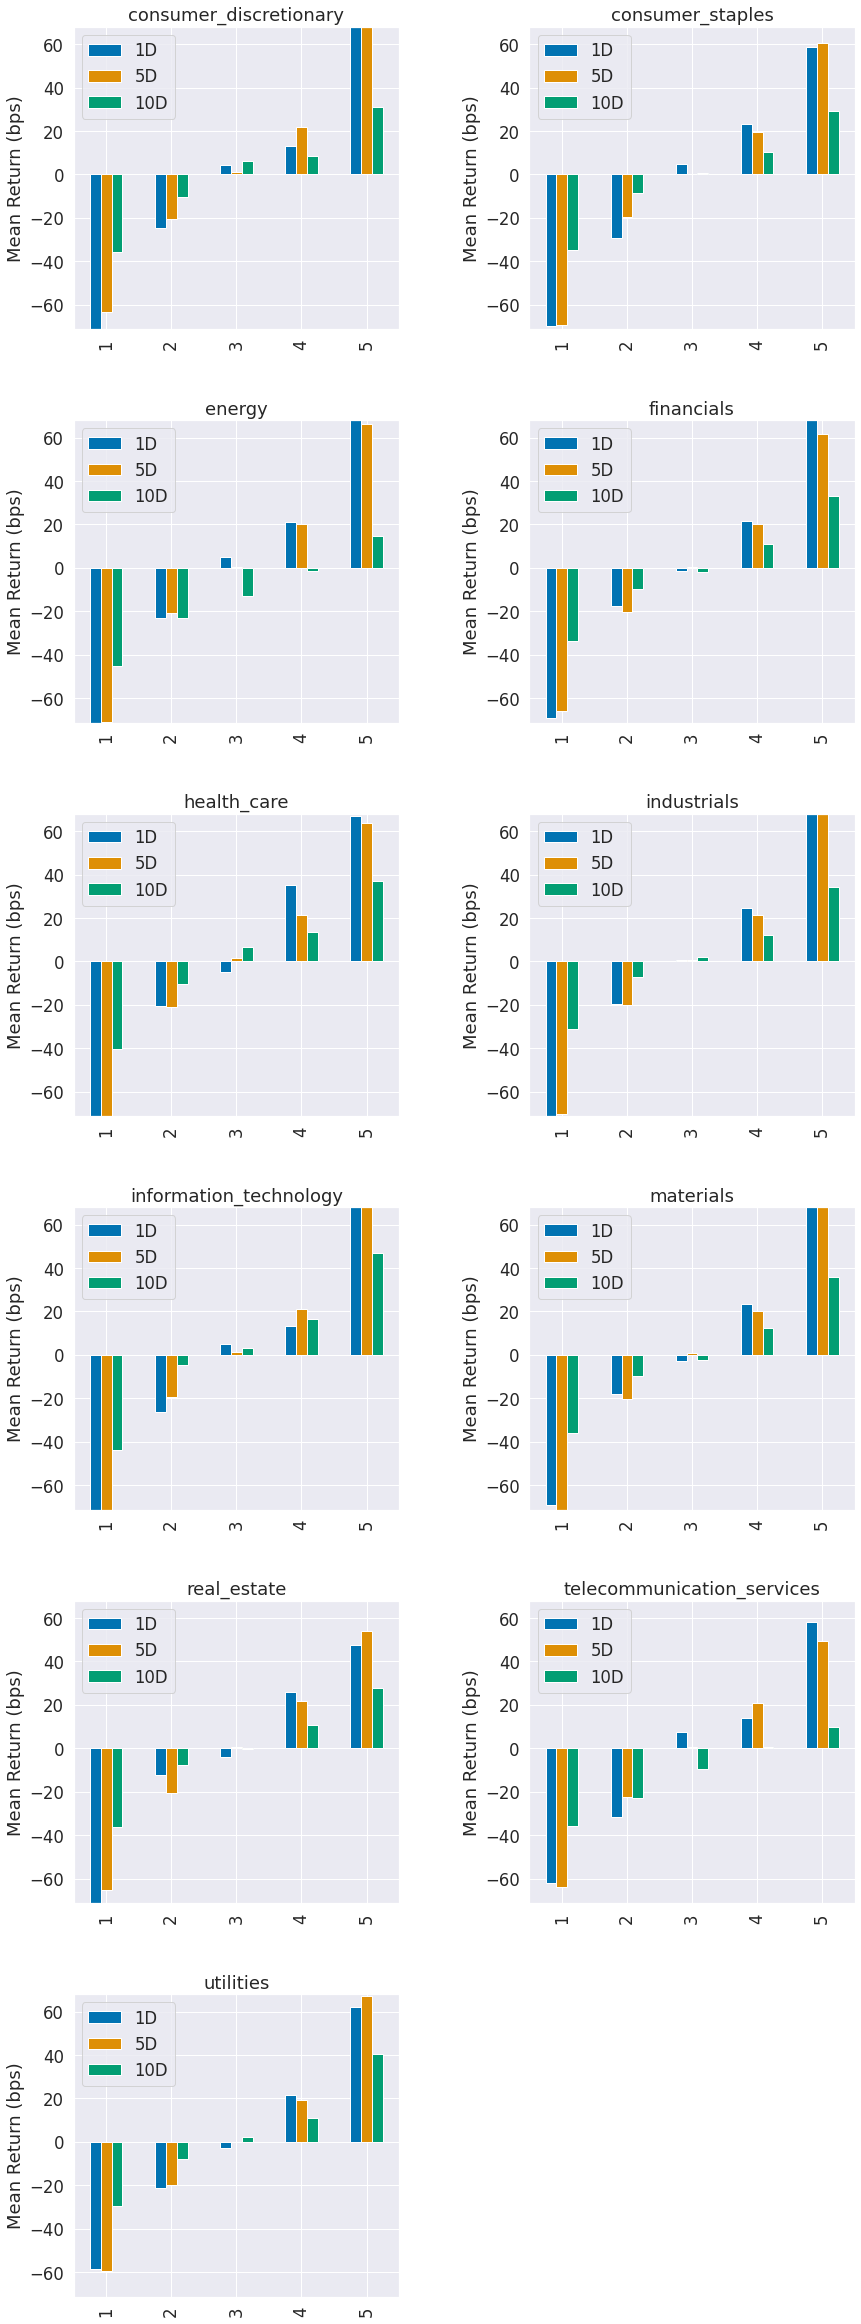

Information Analysis


,1D,5D,10D
IC Mean,0.411,1.000000e+00,0.667
IC Std.,0.147,0.000000e+00,0.106
Risk-Adjusted IC,2.802,2.732019e+16,6.275
t-stat(IC),27.023,2.634664e+17,60.513
p-value(IC),0.000,0.000000e+00,0.000
IC Skew,-0.999,-3.050000e+00,-1.143
IC Kurtosis,2.678,6.300000e+00,1.594


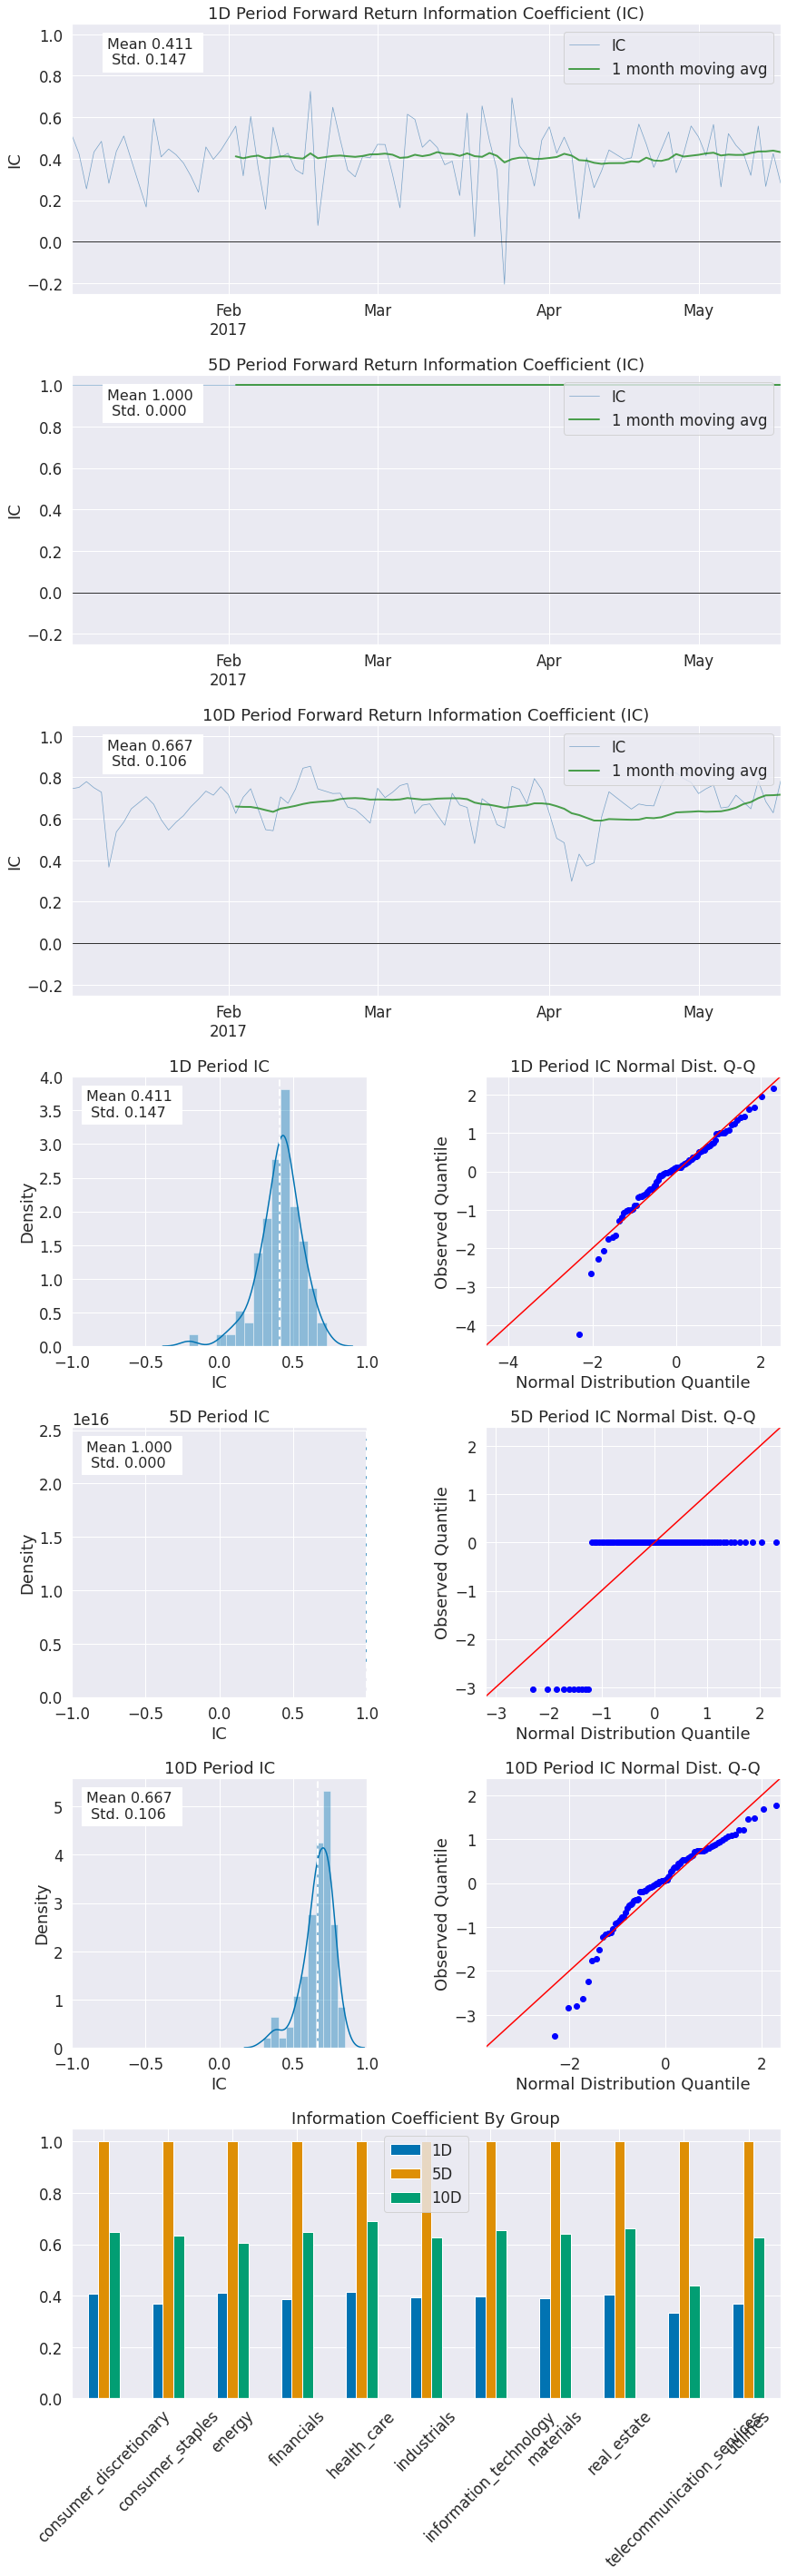

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.339,0.750,0.739
Quantile 2 Mean Turnover,0.607,0.816,0.808
Quantile 3 Mean Turnover,0.648,0.773,0.788
Quantile 4 Mean Turnover,0.615,0.802,0.795
Quantile 5 Mean Turnover,0.352,0.790,0.797


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.746,-0.024,0.031


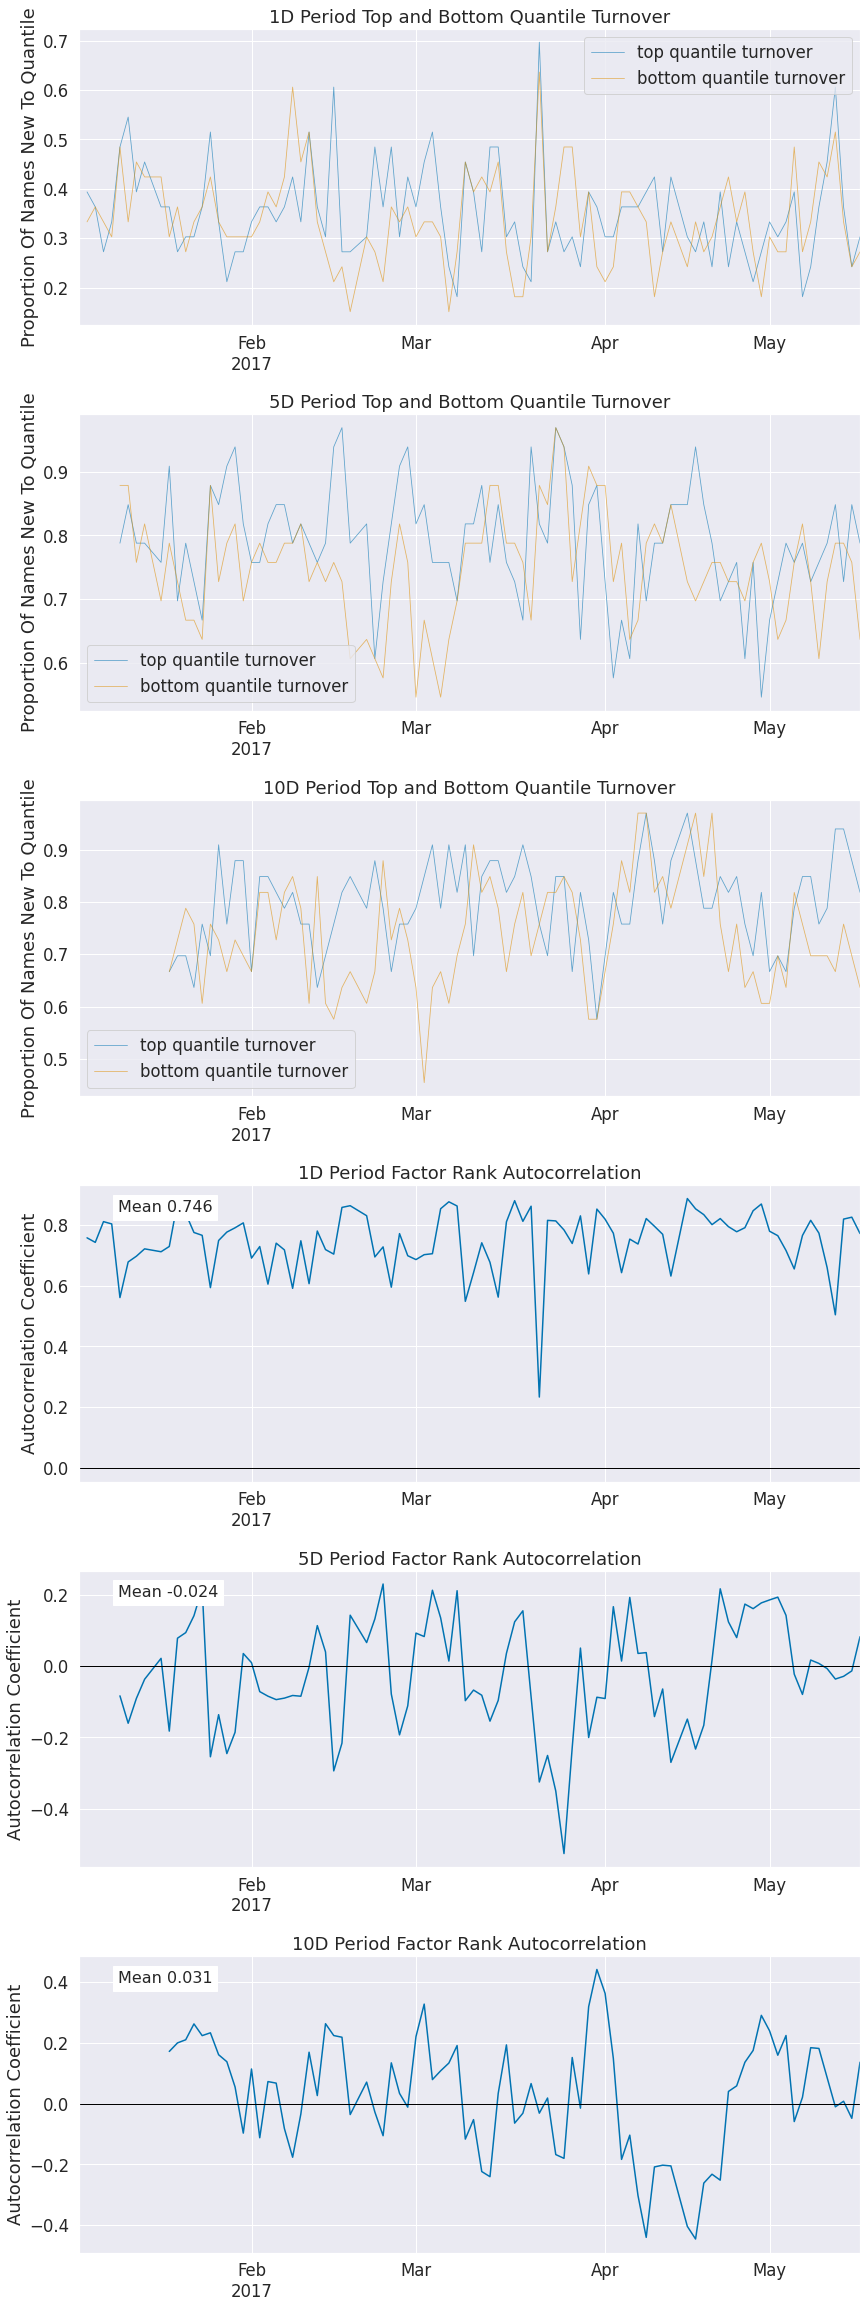

In [12]:
alphalens.tears.create_full_tear_sheet(predictive_factor_data, by_group=True)

# Run Event Style Returns Analysis

## Non-predictive factor

<Figure size 432x288 with 0 Axes>

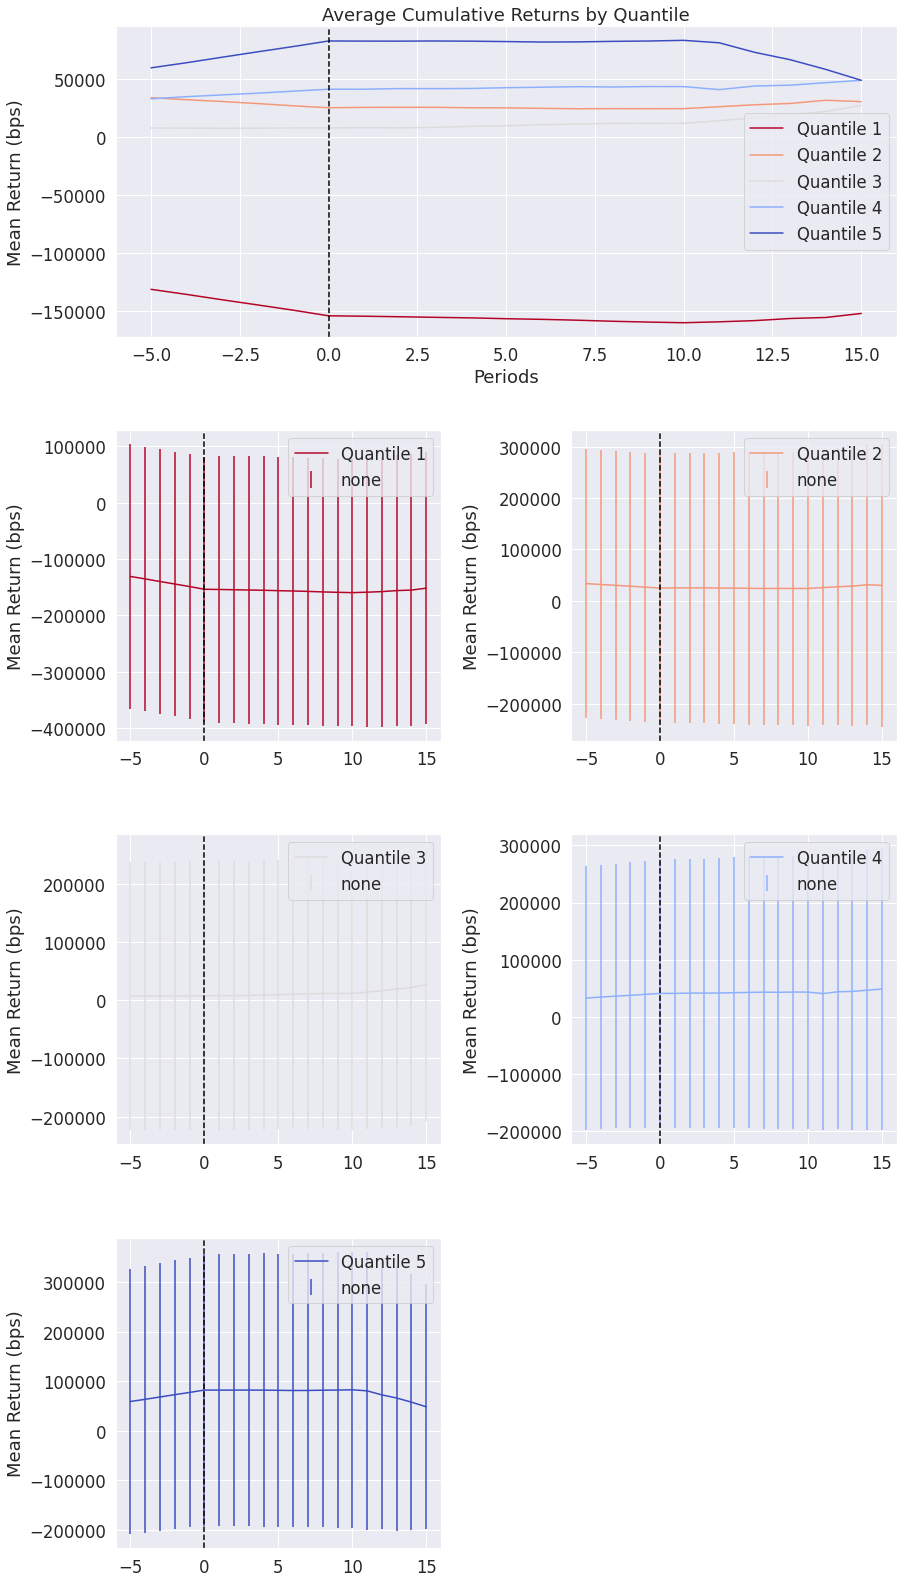

In [13]:
alphalens.tears.create_event_returns_tear_sheet(non_predictive_factor_data, pricing)

## Predictive factor

<Figure size 432x288 with 0 Axes>

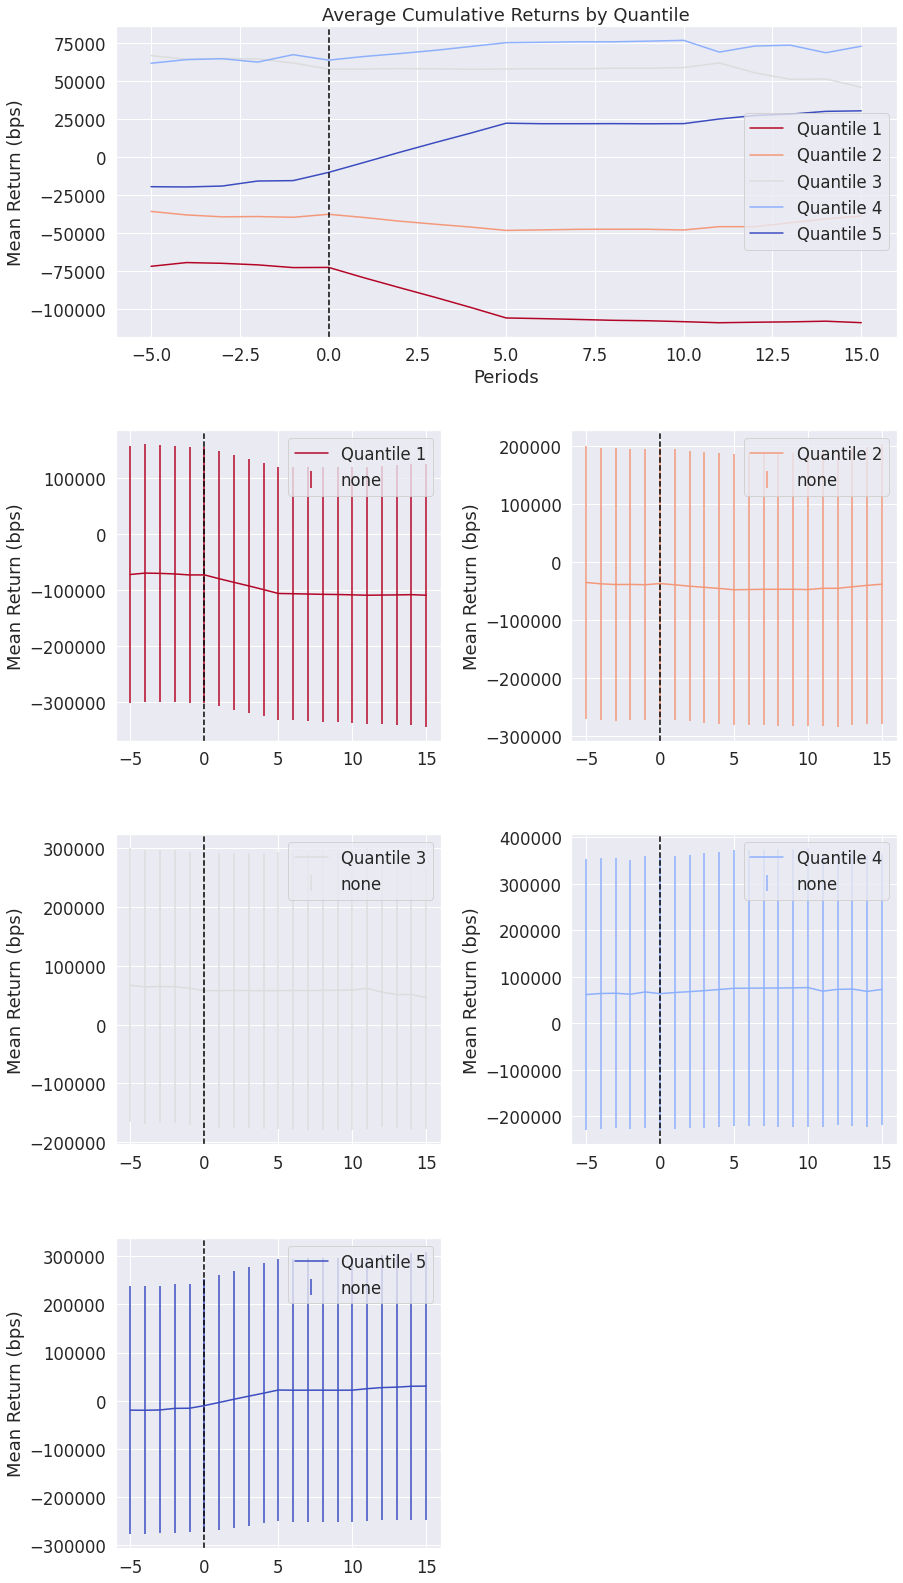

In [14]:
alphalens.tears.create_event_returns_tear_sheet(predictive_factor_data, pricing)